In [1]:
import pandas as pd
import numpy as np
import cv2 
from glob import glob as gb
import matplotlib.pyplot as plt

In [5]:
path = 'C:/Users/REFAI STUDIO/Desktop/Cactus/'
train_path = path + 'train/'
test_path = path + 'test/'

In [6]:
train_path = sorted(gb('C:\\Users\\REFAI STUDIO\\Desktop\\Cactus\\train\\*.jpg'))
test_path = sorted(gb('C:\\Users\\REFAI STUDIO\\Desktop\\Cactus\\test\\*.jpg'))

In [5]:
train = [cv2.imread(image) for image in train_path]

In [10]:
train = np.array(train, dtype='int32')

In [22]:
train_ = np.reshape(train,[train.shape[0],train.shape[1]*train.shape[2]*train.shape[3]])

In [23]:
#import pickle
#with open('train_picle.pkl','wb') as f:
#    pickle.dump(train_, f)

In [2]:
import pickle
with open('train_picle.pkl','rb') as f:
    train_ = pickle.load(f)


In [7]:
train_db = pd.read_csv('train.csv').sort_values('id')
train_db.sort_values('id')
train_label = train_db['has_cactus']

In [8]:
train_path[0][43:] == train_db.iloc[0,0]       # checking 

True

In [9]:
from sklearn.model_selection import train_test_split                                                 
X_train, X_test, y_train, y_test = train_test_split(train_,
                                                    train_label,
                                                    test_size=0.20,
                                                    random_state=42)

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

In [11]:
sgd_clf = SGDClassifier(alpha=0.00000001)

model = sgd_clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [12]:
y_score = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

In [14]:
accuracy_score(y_test,y_score)

0.85

In [17]:
sub = pd.read_csv('sample_submission.csv')
sub.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [19]:
test = [cv2.imread(image) for image in test_path]

In [20]:
test = np.array(test, dtype='int32')
test_ = np.reshape(test,[test.shape[0],test.shape[1]*test.shape[2]*test.shape[3]])

In [25]:
test_sub = model.decision_function(test_)

In [26]:
test_sub = 

array([ 1.37145175e+08,  6.86657371e+08, -4.15374893e+09, ...,
        3.15107070e+09, -7.61958655e+07, -9.27293764e+08])

In [23]:
sub={'id':test_path,'has_cactus':[x for x in test_sub]}
sub_db = pd.DataFrame(sub)
sub_db.head()

,id,has_cactus
0,C:\Users\REFAI STUDIO\Desktop\Cactus\test\0009...,1
1,C:\Users\REFAI STUDIO\Desktop\Cactus\test\0017...,1
2,C:\Users\REFAI STUDIO\Desktop\Cactus\test\001e...,0
3,C:\Users\REFAI STUDIO\Desktop\Cactus\test\002e...,0
4,C:\Users\REFAI STUDIO\Desktop\Cactus\test\0036...,0


In [70]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

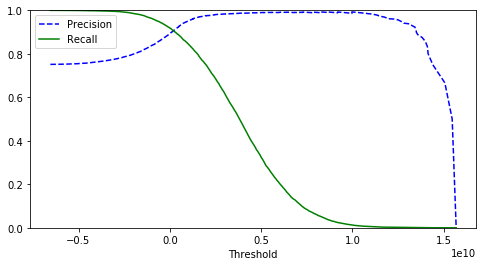

In [92]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
#plt.xlim([-70, 70])
plt.show()

In [100]:
yt= (y_scores > 1)

In [101]:
accuracy_score(y_train,yt)

0.8572142857142857

In [102]:
precision_score(y_train,yt)

0.893613088085775